# Genracion de los valores
Generamos un conjunto de datos simulados para estaturas y pesos. Primero, creamos estaturas aleatorias en un rango realista. Luego, calculamos los pesos usando una fórmula basada en el Índice de Masa Corporal (IMC) para asegurarnos de que sean realistas. Finalmente, guardamos estos datos en una tabla para poder analizarlos más fácilmente.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fijamos una semilla para asegurar la reproducibilidad de los resultados
np.random.seed(42)

# Generamos 100 estaturas aleatorias entre 1.4m y 2.0m
estaturas = np.random.uniform(1.4, 2.0, 100)

pesos = []  # Lista para almacenar los pesos generados

# Bucle para generar pesos aleatorios controlados según la estatura
for estatura in estaturas:
    # Calcular el peso mínimo y máximo usando el IMC saludable (18.5 a 24.9)
    peso_min = 18.5 * (estatura ** 2)  # Peso mínimo según IMC de 18.5
    peso_max = 24.9 * (estatura ** 2)  # Peso máximo según IMC de 24.9
    # Generar un peso aleatorio entre el peso mínimo y máximo calculado
    peso = np.random.uniform(peso_min, peso_max)
    pesos.append(peso)  # Añadir el peso a la lista de pesos

# Crear un DataFrame con los datos de estatura y peso
datos = pd.DataFrame({
    'Estatura (m)': estaturas,
    'Peso (kg)': pesos
})

# Procederemos a mostrar los datos generados anteriormete para revisarlos y entenderlos ademas de generar un CSV por si acaso

En este paso, mostramos los primeros datos generados para asegurarnos de que todo esté en orden. Luego, creamos una gráfica para visualizar la relación entre estatura y peso. Usamos un gráfico de dispersión (scatter plot) para ver cómo se distribuyen los datos. Esto nos ayuda a identificar patrones y verificar si los datos siguen la tendencia esperada.

   Estatura (m)  Peso (kg)
0      1.624724  49.365947
1      1.970429  87.641780
2      1.839196  69.384367
3      1.759195  67.326207
4      1.493611  54.229043


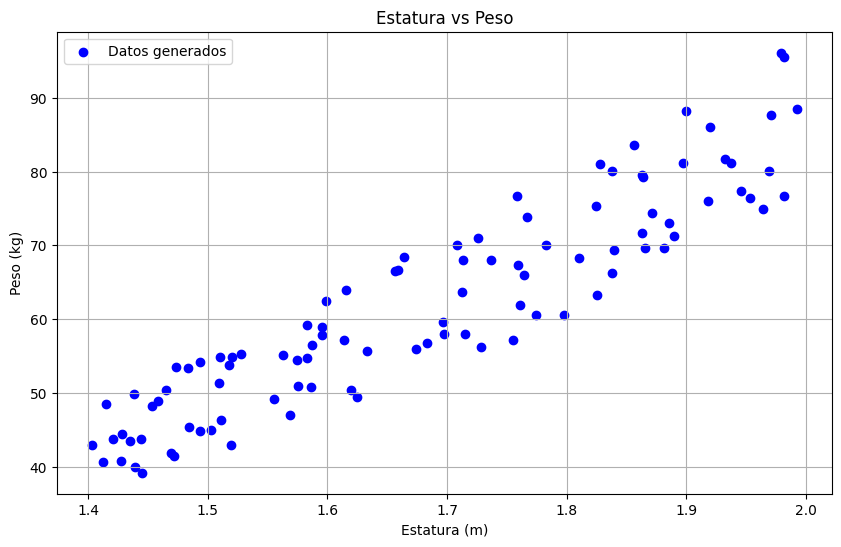

In [3]:
import matplotlib.pyplot as plt
# Mostrar los primeros datos generados
print(datos.head())

# Crear una gráfica de estatura vs peso
plt.figure(figsize=(10, 6))
plt.scatter(datos['Estatura (m)'], datos['Peso (kg)'], color='blue', label='Datos generados')
plt.title('Estatura vs Peso')
plt.xlabel('Estatura (m)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid(True)
plt.show()

# Si deseamos guardar el CSV

In [ ]:
# Guardar el DataFrame en un archivo CSV
datos.to_csv('alturas_pesos_generados.csv', index=False)

# Para entender de mejor manera haremos uso de tres formas de regrecion lineal.
-Búsqueda Exhaustiva.
-Regresión Lineal con Fórmulas Directas.
-Regresión Lineal Usando scikit-learn.

--> Mejor explicacion en PDF adjunto

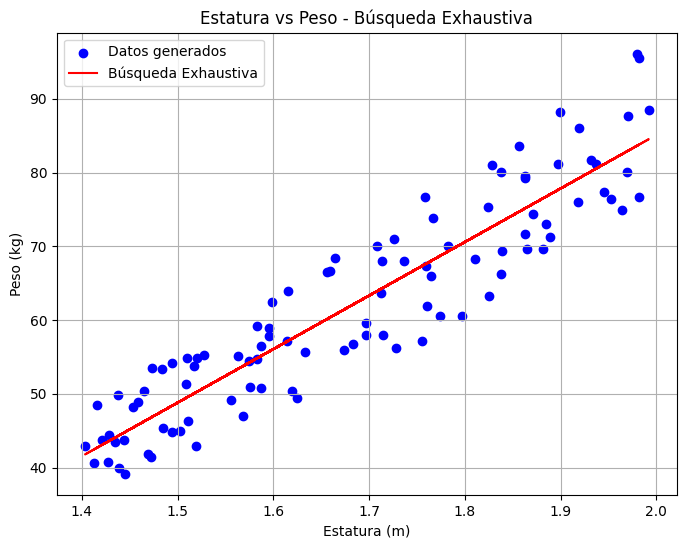

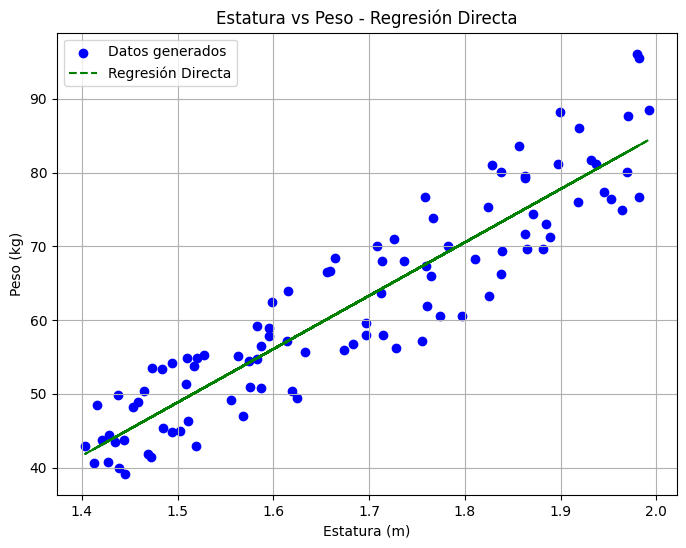

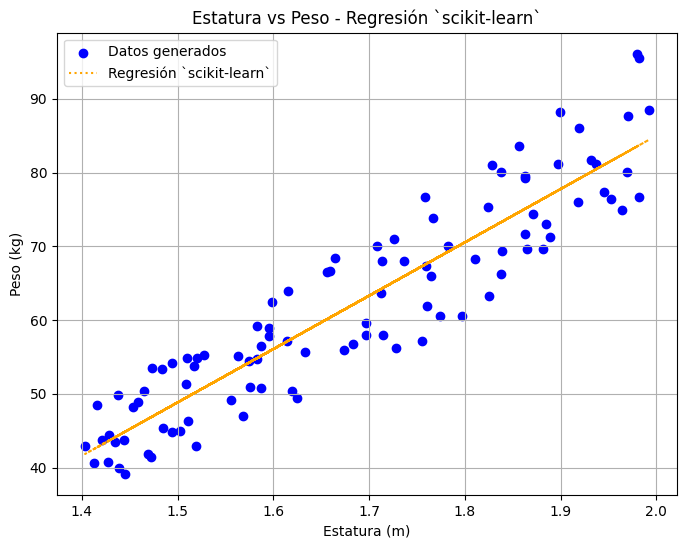

In [15]:
from sklearn.linear_model import LinearRegression

# Método 1: Búsqueda Exhaustiva con Rango Adecuado
def busqueda_exhaustiva(x, y):
    min_error = float('inf')
    best_m = None
    best_b = None
    m_range = np.arange(50, 90, 0.1)  # Pendiente variando de 50 a 90
    b_range = np.arange(-70, -60, 0.1)  # Intercepto variando de -70 a -60
    
    for m_float in m_range:
        for b_float in b_range:
            error = np.sum((y - (m_float * x + b_float)) ** 2)
            if error < min_error:
                min_error = error
                best_m = m_float
                best_b = b_float
    return best_m, best_b

x = datos['Estatura (m)']
y = datos['Peso (kg)']

best_m, best_b = busqueda_exhaustiva(x, y)

# Método 2: Regresión Lineal con Fórmulas Directas
m_directo = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b_directo = np.mean(y) - m_directo * np.mean(x)

# Método 3: Regresión Lineal Usando `scikit-learn`
modelo = LinearRegression()
x_reshaped = x.values.reshape(-1, 1)  # `scikit-learn` requiere que x sea una matriz 2D
modelo.fit(x_reshaped, y)
m_sklearn = modelo.coef_[0]
b_sklearn = modelo.intercept_

# Gráfica 1: Búsqueda Exhaustiva
plt.figure(figsize=(8, 6))
plt.scatter(datos['Estatura (m)'], datos['Peso (kg)'], color='blue', label='Datos generados')
plt.plot(x, best_m * x + best_b, color='red', label='Búsqueda Exhaustiva')
plt.title('Estatura vs Peso - Búsqueda Exhaustiva')
plt.xlabel('Estatura (m)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 2: Regresión Directa
plt.figure(figsize=(8, 6))
plt.scatter(datos['Estatura (m)'], datos['Peso (kg)'], color='blue', label='Datos generados')
plt.plot(x, m_directo * x + b_directo, color='green', linestyle='--', label='Regresión Directa')
plt.title('Estatura vs Peso - Regresión Directa')
plt.xlabel('Estatura (m)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 3: Regresión `scikit-learn`
plt.figure(figsize=(8, 6))
plt.scatter(datos['Estatura (m)'], datos['Peso (kg)'], color='blue', label='Datos generados')
plt.plot(x, m_sklearn * x + b_sklearn, color='orange', linestyle=':', label='Regresión `scikit-learn`')
plt.title('Estatura vs Peso - Regresión `scikit-learn`')
plt.xlabel('Estatura (m)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid(True)
plt.show()

Evaluación de Modelos de Ajuste
En este análisis, comparamos dos métodos de ajuste para modelar la relación entre estatura y peso: la búsqueda exhaustiva y la regresión polinómica de grado 2.

Error cuadrático medio (MSE) para ajuste polinómico: 29.03
Mejor m (búsqueda exhaustiva): 72.60000000000032
Mejor b (búsqueda exhaustiva): -60.10000000000056
Error cuadrático medio (búsqueda exhaustiva): 29.42


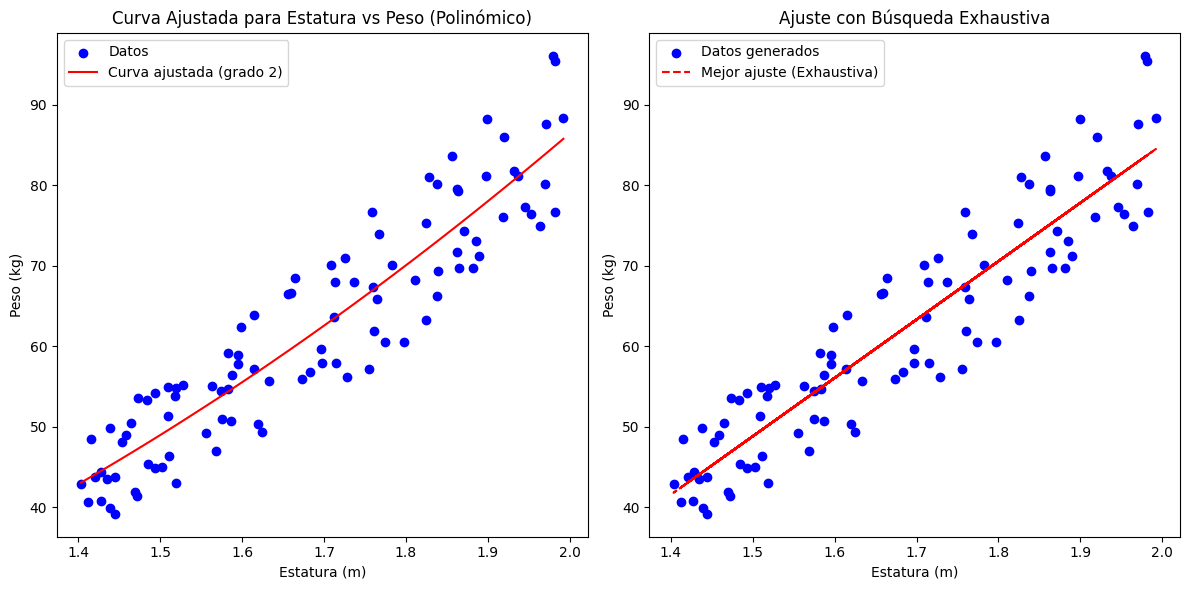

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X = datos['Estatura (m)'].values.reshape(-1, 1)  # Estatura (característica X)
y = datos['Peso (kg)'].values  # Peso (variable objetivo y)


# Calcular el error cuadrático medio para la búsqueda exhaustiva
predicciones_exhaustiva = best_m * X.flatten() + best_b
mse_exhaustiva = mean_squared_error(y, predicciones_exhaustiva)

# Ajuste polinómico de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Genera nuevas características polinómicas basadas en X

model = LinearRegression()
model.fit(X_poly, y)

y_pred_poly = model.predict(X_poly)

# Evaluar el modelo polinómico
mse_poly = mean_squared_error(y, y_pred_poly)
print(f"Error cuadrático medio (MSE) para ajuste polinómico: {mse_poly:.2f}")
print(f"Mejor m (búsqueda exhaustiva): {best_m}")
print(f"Mejor b (búsqueda exhaustiva): {best_b}")
print(f"Error cuadrático medio (búsqueda exhaustiva): {mse_exhaustiva:.2f}")

# Visualización de los resultados
plt.figure(figsize=(12, 6))

# Gráfico de ajuste polinómico
plt.subplot(1, 2, 1)
plt.scatter(datos['Estatura (m)'], datos['Peso (kg)'], color='blue', label='Datos')
plt.plot(np.sort(estaturas), model.predict(poly.transform(np.sort(estaturas).reshape(-1, 1))), color='red', label='Curva ajustada (grado 2)')
plt.title('Curva Ajustada para Estatura vs Peso (Polinómico)')
plt.xlabel('Estatura (m)')
plt.ylabel('Peso (kg)')
plt.legend()

# Gráfico de ajuste con búsqueda exhaustiva
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Datos generados')
plt.plot(X, best_m * X.flatten() + best_b, color='red', linestyle='--', label='Mejor ajuste (Exhaustiva)')
plt.title('Ajuste con Búsqueda Exhaustiva')
plt.xlabel('Estatura (m)')
plt.ylabel('Peso (kg)')
plt.legend()

plt.tight_layout()
plt.show()


Esta evaluación proporciona una visión detallada del desempeño del modelo de búsqueda exhaustiva, mostrando tanto la precisión general del ajuste (MSE) como los errores individuales en una muestra representativa de los datos.

In [20]:

# Calcular las predicciones y el error cuadrático medio (MSE) para el modelo de búsqueda exhaustiva
predicciones_exhaustiva = best_m * x + best_b
mse_exhaustiva = np.mean((y - predicciones_exhaustiva) ** 2)

# Seleccionar una muestra de 20 datos para mostrar
muestra = datos.sample(n=20, random_state=42)
muestra['Predicción'] = best_m * muestra['Estatura (m)'] + best_b
muestra['Error'] = abs(muestra['Peso (kg)'] - muestra['Predicción'])

# Imprimir los resultados en formato de tabla
print("Resultados del Modelo de Búsqueda Exhaustiva:")
print(f"Mejor Pendiente (m): {best_m}")
print(f"Mejor Intercepto (b): {best_b}")
print(f"Error Cuadrático Medio (MSE): {mse_exhaustiva:.2f}\n")

print("Muestra de Datos y Errores:")
print(muestra[['Estatura (m)', 'Peso (kg)', 'Predicción', 'Error']])

Resultados del Modelo de Búsqueda Exhaustiva:
Mejor Pendiente (m): 72.60000000000032
Mejor Intercepto (b): -60.10000000000056
Error Cuadrático Medio (MSE): 29.42

Muestra de Datos y Errores:
    Estatura (m)  Peso (kg)  Predicción      Error
83      1.438135  49.875364   44.308602   5.566762
53      1.936896  81.155780   80.518679   0.637100
70      1.863347  79.289427   75.178982   4.110445
45      1.797513  60.537281   70.399471   9.862190
44      1.555268  49.158411   52.812456   3.654045
39      1.664091  68.452990   60.713043   7.739947
22      1.575287  50.958739   54.265821   3.307082
80      1.917862  76.075459   79.136785   3.061326
10      1.412351  40.601642   42.436661   1.835018
0       1.624724  49.365947   57.854968   8.489021
18      1.659167  66.652685   60.355525   6.297160
30      1.764527  65.918418   68.004654   2.086236
73      1.889277  71.207348   77.061500   5.854152
33      1.969331  80.127831   82.873454   2.745623
90      1.471757  41.362914   46.749525   5.